In [17]:
import os
import sys
import xmltodict
from collections import OrderedDict
import imageio.v3 as iio
from pathlib import Path
from copy import deepcopy
from pprint import pprint

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from turbx import REPO_PATH, log
from turbx.data import DataLoader, Dataset

# max number of frames per video
MAX_LEN=300
FPS=10.0

sns.set_theme()

media_path = Path("./media")
os.makedirs(media_path, exist_ok=True)

In [18]:
label_path = f"{REPO_PATH}/data/labels/cvat-video-1.1"
video_path = f"{REPO_PATH}/data/mp4"
train_dataset = Dataset(videos=video_path, labels=label_path)

label_path = f"{REPO_PATH}/data/labels/cvat-video-1.1/test"
video_path = f"{REPO_PATH}/data/mp4/test"
test_dataset = Dataset(videos=video_path, labels=label_path)

train_data = train_dataset.aligned_data['train']
test_data = test_dataset.aligned_data['test']

[INFO] 11/16/2022 12:37:24PM: MainProcess: data.py - Initializing Dataset...
[INFO] 11/16/2022 12:37:24PM: MainProcess: data.py - 393 video files found
[INFO] 11/16/2022 12:37:24PM: MainProcess: data.py - Initializing Dataset...
[INFO] 11/16/2022 12:37:24PM: MainProcess: data.py - 17 video files found


In [19]:
train_lengths = []
for _, label in train_data:
    train_lengths.append(label["video_length"])

In [20]:
test_lengths = []
for _, label in test_data:
    test_lengths.append(label["video_length"])

In [21]:
# POST PROCESS METHODS

def plot_length_histogram(video_lengths, dataset="train", format="svg", save=False):
    plt.hist(x=video_lengths, bins=10)
    plt.title(f"{dataset.capitalize()}ing Set Video Lengths")
    plt.savefig(f"{str(media_path)}/{dataset}-video-lengths.{format}", format=format) if save else None

def calc_statistics(value_list):
    df = pd.Series(value_list)
    pprint(df.describe())

def plot_dataset_sparsity():
    pass

count     21.000000
mean     191.857143
std      145.485836
min       33.000000
25%       93.000000
50%      160.000000
75%      228.000000
max      676.000000
dtype: float64


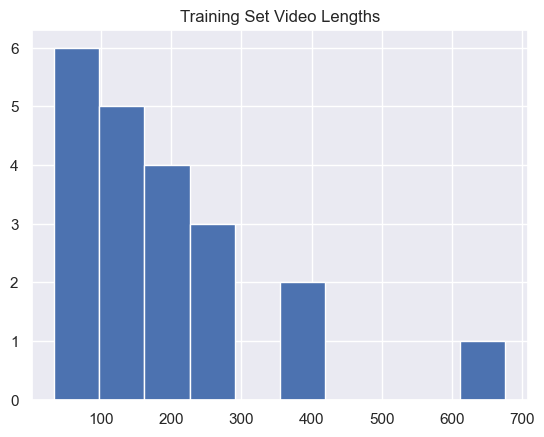

In [23]:
plot_length_histogram(train_lengths, dataset="train", format="pdf", save=True)
calc_statistics(train_lengths)

count      17.000000
mean     6083.647059
std       587.519355
min      4879.000000
25%      5738.000000
50%      6157.000000
75%      6224.000000
max      7211.000000
dtype: float64


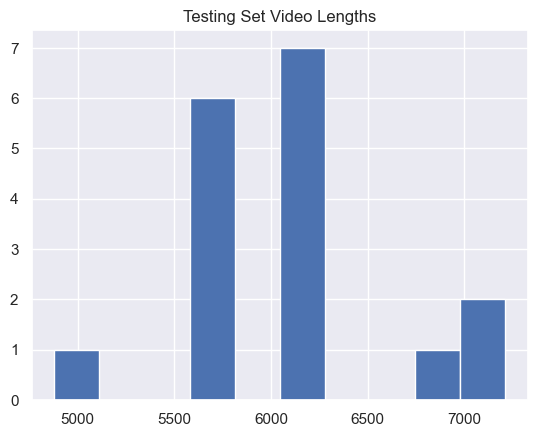

In [16]:
plot_length_histogram(test_lengths, dataset="test")
calc_statistics(test_lengths)